In [1]:
%load_ext nb_black
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns

%matplotlib inline

<IPython.core.display.Javascript object>

In [2]:
# Load the houseprices data from Thinkful's database.
postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "houseprices"
table_name = "houseprices"

db_url = f"postgresql://{postgres_user}:{postgres_pw}@{postgres_host}:{postgres_port}/{postgres_db}"

engine = create_engine(db_url)

prices_df = pd.read_sql_query(f"SELECT * FROM {table_name};", con=engine)

# close the db connetion
engine.dispose()

<IPython.core.display.Javascript object>

In [3]:
prices_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


<IPython.core.display.Javascript object>

In [4]:
prices_df.shape

(1460, 81)

<IPython.core.display.Javascript object>

In [5]:
len(prices_df.select_dtypes(include="number").columns)

38

<IPython.core.display.Javascript object>

In [6]:
prices_df.isnull().sum().sort_values(ascending=False).head(35)

poolqc          1453
miscfeature     1406
alley           1369
fence           1179
fireplacequ      690
lotfrontage      259
garagecond        81
garagetype        81
garageyrblt       81
garagefinish      81
garagequal        81
bsmtexposure      38
bsmtfintype2      38
bsmtfintype1      37
bsmtcond          37
bsmtqual          37
masvnrarea         8
masvnrtype         8
electrical         1
utilities          0
yearremodadd       0
mssubclass         0
foundation         0
extercond          0
exterqual          0
exterior2nd        0
exterior1st        0
roofmatl           0
roofstyle          0
yearbuilt          0
lotconfig          0
overallcond        0
overallqual        0
housestyle         0
bldgtype           0
dtype: int64

<IPython.core.display.Javascript object>

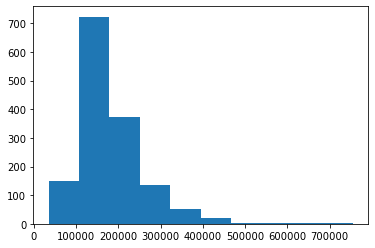

<IPython.core.display.Javascript object>

In [7]:
plt.hist(prices_df.saleprice)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff963c7ed00>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff963c8d430>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff963c7e9a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff963c8daf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff963c8de50>],
 'means': []}

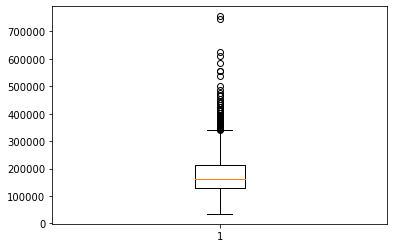

<IPython.core.display.Javascript object>

In [8]:
plt.boxplot(prices_df.saleprice)

In [9]:
prices_df2 = prices_df.copy()

<IPython.core.display.Javascript object>

In [10]:
# prices_df2 = prices_df2.loc[prices_df["saleprice"] < 500000]

<IPython.core.display.Javascript object>

In [11]:

cols_to_drop = [
    "fireplacequ",
    "fence",
    "alley",
    "miscfeature",
    "poolqc",
    "id"
]
prices_df2.drop(columns=cols_to_drop, inplace=True)
print(
    (prices_df2.isnull().sum() / prices_df2.isnull().count())
    .sort_values(ascending=False)
    .head(14)
)
prices_df2.head()



lotfrontage     0.177397
garagetype      0.055479
garageyrblt     0.055479
garagecond      0.055479
garagequal      0.055479
garagefinish    0.055479
bsmtexposure    0.026027
bsmtfintype2    0.026027
bsmtfintype1    0.025342
bsmtcond        0.025342
bsmtqual        0.025342
masvnrarea      0.005479
masvnrtype      0.005479
electrical      0.000685
dtype: float64


,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,...,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


<IPython.core.display.Javascript object>

In [12]:
cols_with_nulls = (
    (prices_df2.isnull().sum() / prices_df2.isnull().count())
    .sort_values(ascending=False)
    .index
)

prices_df2.dropna(inplace=True)
(prices_df2.isnull().sum() / prices_df2.isnull().count()).sort_values(
    ascending=False
).head(12)

saleprice       0.0
yearremodadd    0.0
roofmatl        0.0
exterior1st     0.0
exterior2nd     0.0
masvnrtype      0.0
masvnrarea      0.0
exterqual       0.0
extercond       0.0
foundation      0.0
bsmtqual        0.0
bsmtcond        0.0
dtype: float64

<IPython.core.display.Javascript object>

In [13]:
y = prices_df2["saleprice"]
X = prices_df2.select_dtypes(include="number")
X = X.drop("saleprice", axis=1)

<IPython.core.display.Javascript object>

In [14]:
# Split data into train and test sets.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<IPython.core.display.Javascript object>

In [15]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV


<IPython.core.display.Javascript object>

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error



<IPython.core.display.Javascript object>

In [17]:
# Ridge
grid = {"alpha": np.logspace(-3, 5, 9)}
ridge_cv = GridSearchCV(Ridge(), grid, cv=5)
ridge_cv.fit(X_train, y_train)
y_test_pred = ridge_cv.best_estimator_.predict(X_test)

<IPython.core.display.Javascript object>

In [18]:
print(
    f"alpha: {ridge_cv.best_estimator_.alpha}\n"
    f"Train score: {ridge_cv.best_estimator_.score(X_train, y_train):.3f}\n"
    f"Test: score: {ridge_cv.best_estimator_.score(X_test, y_test):.3f}\n"
    f"Mean absolute error: {mean_absolute_error(y_test, y_test_pred):.3f}\n"
    f"MSE: {mean_squared_error(y_test, y_test_pred):.3f}\n"
    f"RMSE: {mean_squared_error(y_test, y_test_pred, squared=False):.3f}\n"
    f"MAPE: {np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100:.3f}"
)

alpha: 10.0
Train score: 0.799
Test: score: 0.843
Mean absolute error: 22209.891
MSE: 882752016.794
RMSE: 29711.143
MAPE: 13.839


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Predicted prices')

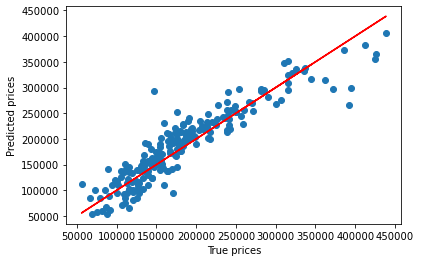

<IPython.core.display.Javascript object>

In [19]:
plt.scatter(y_test, y_test_pred)
plt.plot(y_test, y_test, color="r")
plt.xlabel("True prices")
plt.ylabel("Predicted prices")

In [20]:
# Lasso
lasso_cv = GridSearchCV(Lasso(max_iter=10000), grid, cv=5)
lasso_cv.fit(X_train, y_train)
y_test_pred = lasso_cv.best_estimator_.predict(X_test)

/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42942746712.3396, tolerance: 517778630.9684587
  model = cd_fast.enet_coordinate_descent(
/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42942867029.31653, tolerance: 517778630.9684587
  model = cd_fast.enet_coordinate_descent(
/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42945006040.73572, tolerance: 517778630.9684587
  model = cd_fast.enet_coordinate_descent(
/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_mode

<IPython.core.display.Javascript object>

In [21]:
print(
    f"alpha: {lasso_cv.best_estimator_.alpha}\n"
    f"Train score: {lasso_cv.best_estimator_.score(X_train, y_train):.3f}\n"
    f"Test: score: {lasso_cv.best_estimator_.score(X_test, y_test):.3f}\n"
    f"Mean absolute error: {mean_absolute_error(y_test, y_test_pred):.3f}\n"
    f"MSE: {mean_squared_error(y_test, y_test_pred):.3f}\n"
    f"RMSE: {mean_squared_error(y_test, y_test_pred, squared=False):.3f}\n"
    f"MAPE: {np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100:.3f}"
)

alpha: 1000.0
Train score: 0.793
Test: score: 0.845
Mean absolute error: 21789.447
MSE: 874502844.843
RMSE: 29571.994
MAPE: 13.486


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Predicted prices')

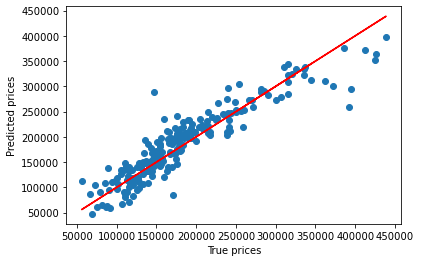

<IPython.core.display.Javascript object>

In [22]:
plt.scatter(y_test, y_test_pred)
plt.plot(y_test, y_test, color="r")
plt.xlabel("True prices")
plt.ylabel("Predicted prices")

In [23]:
# ElasticNet

grid = {"alpha": np.logspace(-3, 5, 9),
        'l1_ratio':[0.25,0.5,0.75, 1]
       }


elastic_cv = GridSearchCV(ElasticNet(max_iter=10000), grid, cv=5, verbose=1)
elastic_cv.fit(X_train, y_train)
y_test_pred = elastic_cv.best_estimator_.predict(X_test)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 457599487127.6323, tolerance: 479289592.00731117
  model = cd_fast.enet_coordinate_descent(
/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 486596660817.35925, tolerance: 517778630.9684587
  model = cd_fast.enet_coordinate_descent(
/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 555577170536.7197, tolerance: 516698598.3375909
  model = cd_fast.enet_coordinate

/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 452464301908.4079, tolerance: 517778630.9684587
  model = cd_fast.enet_coordinate_descent(
/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 512200700103.17474, tolerance: 516698598.3375909
  model = cd_fast.enet_coordinate_descent(
/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 354053852028.02576, tolerance: 528840960.0464107
  model = cd_fast.enet_coordinate_descent(
/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_m

/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 565351358832.577, tolerance: 517778630.9684587
  model = cd_fast.enet_coordinate_descent(
/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 636249171496.2264, tolerance: 516698598.3375909
  model = cd_fast.enet_coordinate_descent(
/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 447177136812.9403, tolerance: 528840960.0464107
  model = cd_fast.enet_coordinate_descent(
/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_mode

/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 527461103.1430664, tolerance: 517778630.9684587
  model = cd_fast.enet_coordinate_descent(
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   39.5s finished


<IPython.core.display.Javascript object>

In [24]:
print(
    f"alpha: {elastic_cv.best_estimator_.alpha}\n"
    f"l1 ratio: {elastic_cv.best_estimator_.l1_ratio}\n"
    f"Train score: {elastic_cv.best_estimator_.score(X_train, y_train):.3f}\n"
    f"Test: score: {elastic_cv.best_estimator_.score(X_test, y_test):.3f}\n"
    f"Mean absolute error: {mean_absolute_error(y_test, y_test_pred):.3f}\n"
    f"MSE: {mean_squared_error(y_test, y_test_pred):.3f}\n"
    f"RMSE: {mean_squared_error(y_test, y_test_pred, squared=False):.3f}\n"
    f"MAPE: {np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100:.3f}"
)

alpha: 1000.0
l1 ratio: 1
Train score: 0.793
Test: score: 0.845
Mean absolute error: 21789.447
MSE: 874502844.843
RMSE: 29571.994
MAPE: 13.486


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Predicted prices')

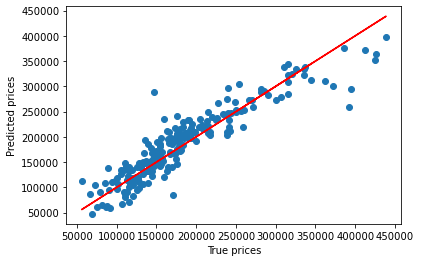

<IPython.core.display.Javascript object>

In [25]:
plt.scatter(y_test, y_test_pred)
plt.plot(y_test, y_test, color="r")
plt.xlabel("True prices")
plt.ylabel("Predicted prices")

In [36]:
years = list(prices_df.yrsold.unique())
years.sort()
years

[2006, 2007, 2008, 2009, 2010]

<IPython.core.display.Javascript object>

interest rates found here: http://www.freddiemac.com/pmms/pmms30.html


In [37]:
interest_rates = {2006: 6.41, 2007: 6.34, 2008: 6.03, 2009: 5.04, 2010: 4.69}

<IPython.core.display.Javascript object>

In [42]:
X["interest_rate"] = X.yrsold.map(interest_rates)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<IPython.core.display.Javascript object>

alpha: 10.0
Train score: 0.799
Test: score: 0.832
Mean absolute error: 22303.752
MSE: 1091574994.372
RMSE: 33038.992
MAPE: 12.697


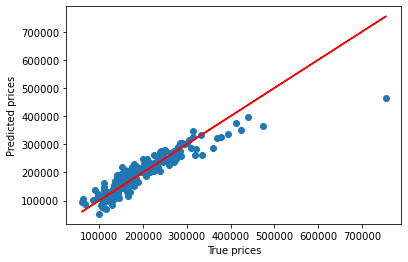

<IPython.core.display.Javascript object>

In [45]:
# Ridge
grid = {"alpha": np.logspace(-3, 5, 9)}
ridge_cv = GridSearchCV(Ridge(), grid, cv=5)
ridge_cv.fit(X_train, y_train)
y_test_pred = ridge_cv.best_estimator_.predict(X_test)

print(
    f"alpha: {ridge_cv.best_estimator_.alpha}\n"
    f"Train score: {ridge_cv.best_estimator_.score(X_train, y_train):.3f}\n"
    f"Test: score: {ridge_cv.best_estimator_.score(X_test, y_test):.3f}\n"
    f"Mean absolute error: {mean_absolute_error(y_test, y_test_pred):.3f}\n"
    f"MSE: {mean_squared_error(y_test, y_test_pred):.3f}\n"
    f"RMSE: {mean_squared_error(y_test, y_test_pred, squared=False):.3f}\n"
    f"MAPE: {np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100:.3f}"
)

plt.scatter(y_test, y_test_pred)
plt.plot(y_test, y_test, color="r")
plt.xlabel("True prices")
plt.ylabel("Predicted prices")
plt.show()

/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35443220452.35339, tolerance: 458755213.2800377
  model = cd_fast.enet_coordinate_descent(
/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41868548951.780396, tolerance: 516752288.6302931
  model = cd_fast.enet_coordinate_descent(
/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42618384155.61145, tolerance: 509905960.9684177
  model = cd_fast.enet_coordinate_descent(
/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_mo

alpha: 100.0
Train score: 0.799
Test: score: 0.832
Mean absolute error: 22352.681
MSE: 1089821239.009
RMSE: 33012.441
MAPE: 12.740


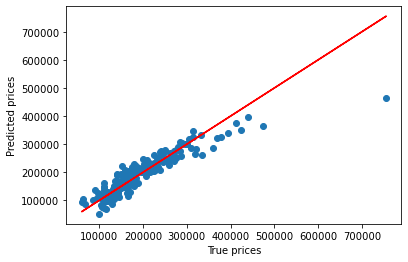

<IPython.core.display.Javascript object>

In [46]:
# Lasso
lasso_cv = GridSearchCV(Lasso(max_iter=10000), grid, cv=5)
lasso_cv.fit(X_train, y_train)
y_test_pred = lasso_cv.best_estimator_.predict(X_test)

print(
    f"alpha: {lasso_cv.best_estimator_.alpha}\n"
    f"Train score: {lasso_cv.best_estimator_.score(X_train, y_train):.3f}\n"
    f"Test: score: {lasso_cv.best_estimator_.score(X_test, y_test):.3f}\n"
    f"Mean absolute error: {mean_absolute_error(y_test, y_test_pred):.3f}\n"
    f"MSE: {mean_squared_error(y_test, y_test_pred):.3f}\n"
    f"RMSE: {mean_squared_error(y_test, y_test_pred, squared=False):.3f}\n"
    f"MAPE: {np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100:.3f}"
)

plt.scatter(y_test, y_test_pred)
plt.plot(y_test, y_test, color="r")
plt.xlabel("True prices")
plt.ylabel("Predicted prices")
plt.show()

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 362743726772.51624, tolerance: 496437308.40510345
  model = cd_fast.enet_coordinate_descent(
/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 424250175676.62537, tolerance: 473805653.9611684
  model = cd_fast.enet_coordinate_descent(
/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 446756342379.45807, tolerance: 458755213.2800377
  model = cd_fast.enet_coordina

/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 524670230676.1959, tolerance: 509905960.9684177
  model = cd_fast.enet_coordinate_descent(
/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 328701111529.5443, tolerance: 496437308.40510345
  model = cd_fast.enet_coordinate_descent(
/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 345652535836.82794, tolerance: 473805653.9611684
  model = cd_fast.enet_coordinate_descent(
/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_m

/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 431399494036.56854, tolerance: 496437308.40510345
  model = cd_fast.enet_coordinate_descent(
/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 539453016671.16895, tolerance: 473805653.9611684
  model = cd_fast.enet_coordinate_descent(
/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 547815905291.8109, tolerance: 458755213.2800377
  model = cd_fast.enet_coordinate_descent(
/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_

/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 686805464842.7284, tolerance: 509905960.9684177
  model = cd_fast.enet_coordinate_descent(
/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 396555464285.48846, tolerance: 496437308.40510345
  model = cd_fast.enet_coordinate_descent(
/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 531702105765.5935, tolerance: 473805653.9611684
  model = cd_fast.enet_coordinate_descent(
/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/linear_m

alpha: 0.1
Train score: 0.798
Test: score: 0.833
Mean absolute error: 22124.522
MSE: 1082076136.012
RMSE: 32894.926
MAPE: 12.565


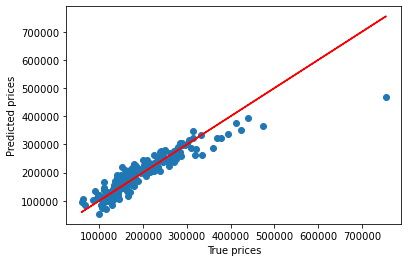

<IPython.core.display.Javascript object>

In [47]:
# ElasticNet

grid = {"alpha": np.logspace(-3, 5, 9), "l1_ratio": [0.25, 0.5, 0.75, 1]}


elastic_cv = GridSearchCV(ElasticNet(max_iter=10000), grid, cv=5, verbose=1)
elastic_cv.fit(X_train, y_train)
y_test_pred = elastic_cv.best_estimator_.predict(X_test)

print(
    f"alpha: {elastic_cv.best_estimator_.alpha}\n"
    f"Train score: {elastic_cv.best_estimator_.score(X_train, y_train):.3f}\n"
    f"Test: score: {elastic_cv.best_estimator_.score(X_test, y_test):.3f}\n"
    f"Mean absolute error: {mean_absolute_error(y_test, y_test_pred):.3f}\n"
    f"MSE: {mean_squared_error(y_test, y_test_pred):.3f}\n"
    f"RMSE: {mean_squared_error(y_test, y_test_pred, squared=False):.3f}\n"
    f"MAPE: {np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100:.3f}"
)

plt.scatter(y_test, y_test_pred)
plt.plot(y_test, y_test, color="r")
plt.xlabel("True prices")
plt.ylabel("Predicted prices")
plt.show()